In [31]:
import numpy as np
import pandas as pd

sales_flow_data = pd.read_excel('附件2.xlsx')
sales_flow_data

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


In [55]:
product_info = pd.read_excel('附件1.xlsx')
category = product_info['分类名称'].unique()
sales_flow_data_1 = sales_flow_data[sales_flow_data['销售类型'] == '销售']
df = pd.merge(sales_flow_data_1, product_info,on= '单品编码')
df_category = df[['销售日期','销量(千克)','分类名称']]

#按每天的日期和不同的蔬菜类型集聚统计销量总值
sum_by_date_and_category_temp = df_category.groupby(['销售日期','分类名称'], as_index=False).sum()
# sum_by_date_and_category.reset_index(inplace=True)
sum_by_date_and_category = pd.pivot(sum_by_date_and_category_temp, index='销售日期',columns='分类名称')

#将0级索引'销量(千克)'去除
sum_by_date_and_category.columns=sum_by_date_and_category.columns.droplevel(0)
#将nan值填充为0(因为有可能当天没有买这类蔬菜，而导致出现nan值)
sum_by_date_and_category = sum_by_date_and_category.fillna(0)

sum_by_date_and_category

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
销售日期,,,,,,
2020-07-01,4.850,205.402,47.076,35.374,76.715,35.365
2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2020-07-03,9.572,191.779,42.076,35.896,64.253,42.442
2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...
2023-06-26,10.384,80.524,8.083,21.224,72.185,39.582
2023-06-27,16.454,127.278,14.272,8.415,67.120,38.708
2023-06-28,14.946,130.182,16.069,15.651,68.534,53.742


In [33]:
#记录以day为计的时间戳的蔬菜各单品销售量
sales_flow_data_2 = sales_flow_data[(sales_flow_data['销售类型'] == '销售') & (sales_flow_data['是否打折销售'] == '否')]
df = pd.merge(sales_flow_data_2, product_info,on= '单品编码')
df_product = df[['销售日期','销售单价(元/千克)','单品名称']]

#none列无意义，用于集计函数
df_product['none'] = [0 for i in range(len(df_product))]
temp = df_product.groupby(['销售日期','单品名称','销售单价(元/千克)'], as_index=False).sum().drop_duplicates(subset=['销售日期', '单品名称'], keep='first')
# temp['销售单价(元/千克)'] = [(temp.loc[i,'销售单价(元/千克)'],temp.loc[i,'none']) for i in range(len(temp))]
product = pd.pivot(temp, index='销售日期', columns='单品名称')

product = product.drop('none', axis=1)
#将0级索引'销售单价(元/千克)'去除
product.columns=product.columns.droplevel(0)

product

C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\627300012.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['none'] = [0 for i in range(len(df_product))]


单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,16.0,NaN,NaN,10.0,NaN,NaN,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,14.0,NaN,NaN,10.0,NaN,10.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,14.0,NaN,NaN,10.0,NaN,10.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-04,14.0,NaN,NaN,10.0,NaN,10.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-05,14.0,NaN,NaN,10.0,NaN,11.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,NaN,20.8,NaN,8.0,NaN,NaN,NaN,7.2,4.5,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,NaN,20.8,NaN,8.0,NaN,NaN,NaN,7.2,4.5,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-28,NaN,20.8,NaN,8.0,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#按单品每天售价
product.to_csv('按单品每天售价.csv')

In [57]:
#记录以day为计的时间戳的蔬菜各单品折扣价
import datetime
sales_flow_data_3 = sales_flow_data[(sales_flow_data['销售类型'] == '销售') & (sales_flow_data['是否打折销售'] == '是')]
df = pd.merge(sales_flow_data_3, product_info,on= '单品编码')
df_product_discount = df[['销售日期','销售单价(元/千克)','单品名称']]

#none列无意义，用于集计函数
df_product_discount['none'] = [0 for i in range(len(df_product_discount))]
temp_discount= df_product_discount.groupby(['销售日期','单品名称','销售单价(元/千克)'], as_index=False).sum().drop_duplicates(subset=['销售日期', '单品名称'], keep='first')
# temp['销售单价(元/千克)'] = [(temp.loc[i,'销售单价(元/千克)'],temp.loc[i,'none']) for i in range(len(temp))]
product_discount = pd.pivot(temp_discount, index='销售日期', columns='单品名称')

product_discount = product_discount.drop('none', axis=1)
#将0级索引'销售单价(元/千克)'去除
product_discount.columns=product_discount.columns.droplevel(0)

sale_price_discount__within21 = product_discount[((product_discount.index >= datetime.datetime.strptime('2020-07-01','%Y-%m-%d')) & (product_discount.index <= datetime.datetime.strptime('2020-07-07','%Y-%m-%d'))) |
                                   ((product_discount.index >= datetime.datetime.strptime('2021-07-01','%Y-%m-%d')) & (product_discount.index <= datetime.datetime.strptime('2021-07-07','%Y-%m-%d'))) |
                                   ((product_discount.index >= datetime.datetime.strptime('2022-07-01','%Y-%m-%d')) & (product_discount.index <= datetime.datetime.strptime('2022-07-07','%Y-%m-%d')))]
sale_price_discount__within21.to_csv('各年7.1-7.7单品折扣价格.csv')
sale_price_discount__within21

C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\4218693101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_discount['none'] = [0 for i in range(len(df_product_discount))]


单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,云南油麦菜,云南油麦菜(份),云南生菜,云南生菜(份),...,鲜粽叶(袋)(3),黄心菜(1),黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑牛肝菌,黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4,NaN,...,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN
2020-07-03,NaN,NaN,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-04,NaN,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.4,NaN,NaN,NaN,NaN,NaN
2020-07-05,NaN,NaN,NaN,9.7,NaN,NaN,NaN,NaN,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
sale_price_discount__within7 = product_discount.loc[['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30']]
sale_price_discount__within7.to_csv('6.24-6.30单品折扣价格.csv')
sale_price_discount__within7

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,云南油麦菜,云南油麦菜(份),云南生菜,云南生菜(份),...,鲜粽叶(袋)(3),黄心菜(1),黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑牛肝菌,黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2023-06-24,NaN,11.9,NaN,NaN,NaN,NaN,NaN,2.7,NaN,2.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN,2.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26,NaN,12.5,NaN,NaN,NaN,NaN,NaN,2.7,NaN,2.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,NaN,12.5,NaN,NaN,NaN,NaN,NaN,3.6,NaN,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN,2.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#用于2-2的各年7.1-7.7各品类销量表格
import datetime
sales_within21 = sum_by_date_and_category[((sum_by_date_and_category.index >= datetime.datetime.strptime('2020-07-01','%Y-%m-%d')) & (sum_by_date_and_category.index <= datetime.datetime.strptime('2020-07-07','%Y-%m-%d'))) |
                                   ((sum_by_date_and_category.index >= datetime.datetime.strptime('2021-07-01','%Y-%m-%d')) & (sum_by_date_and_category.index <= datetime.datetime.strptime('2021-07-07','%Y-%m-%d'))) |
                                   ((sum_by_date_and_category.index >= datetime.datetime.strptime('2022-07-01','%Y-%m-%d')) & (sum_by_date_and_category.index <= datetime.datetime.strptime('2022-07-07','%Y-%m-%d')))]
#删除异常单品
# sales_within21 = sum_by_date_and_product.drop(abnormal_list, axis=1)

sales_within21 .to_csv('各年7.1-7.7各品类销量.csv')
sales_within21 

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
销售日期,,,,,,
2020-07-01,4.850,205.402,47.076,35.374,76.715,35.365
2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2020-07-03,9.572,191.779,42.076,35.896,64.253,42.442
2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213
2020-07-06,3.089,195.740,42.721,30.727,58.682,40.578
2020-07-07,3.117,175.052,45.749,32.112,42.213,52.560
2021-07-01,8.512,148.597,33.720,26.278,54.567,32.650
2021-07-02,10.790,133.586,24.972,28.565,51.785,34.247


In [58]:
#2023-06-24到2023-06-30的各品类销量
sales_within7 = sum_by_date_and_category.loc[['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30']]
sales_within7 .to_csv('6.24-6.30各品类销量.csv')
sales_within7 

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
销售日期,,,,,,
2023-06-24,16.054,161.495,11.548,28.369,94.187,54.180
2023-06-25,16.500,108.895,10.681,23.315,69.658,35.271
2023-06-26,10.384,80.524,8.083,21.224,72.185,39.582
2023-06-27,16.454,127.278,14.272,8.415,67.120,38.708
2023-06-28,14.946,130.182,16.069,15.651,68.534,53.742
2023-06-29,22.945,135.090,24.367,11.511,89.113,48.314
2023-06-30,19.419,130.464,28.087,24.530,82.286,39.572


In [63]:
#统计损耗率
import datetime
sales_flow_data_2 = sales_flow_data[(sales_flow_data['销售类型'] == '销售') & (sales_flow_data['是否打折销售'] == '否')]
df = pd.merge(sales_flow_data_2, product_info,on= '单品编码')
df_category = df[['销售日期','销量(千克)','分类名称']]

#按每天的日期和不同的蔬菜类型集聚统计销量总值
sale_temp = df_category.groupby(['销售日期','分类名称'], as_index=False).sum()
# sum_by_date_and_category.reset_index(inplace=True)
sale = pd.pivot(sale_temp, index='销售日期',columns='分类名称')

#将0级索引'销量(千克)'去除
sale.columns=sale.columns.droplevel(0)
#将nan值填充为0(因为有可能当天没有买这类蔬菜，而导致出现nan值)
sale = sale.fillna(0)

sale_discount_within21 = sale[((sale.index >= datetime.datetime.strptime('2020-07-01','%Y-%m-%d')) & (sale.index <= datetime.datetime.strptime('2020-07-07','%Y-%m-%d'))) |
                                   ((sale.index >= datetime.datetime.strptime('2021-07-01','%Y-%m-%d')) & (sale.index <= datetime.datetime.strptime('2021-07-07','%Y-%m-%d'))) |
                                   ((sale.index >= datetime.datetime.strptime('2022-07-01','%Y-%m-%d')) & (sale.index <= datetime.datetime.strptime('2022-07-07','%Y-%m-%d')))]
#删除异常单品
# sales_within21 = sum_by_date_and_product.drop(abnormal_list, axis=1)

#三年21天内各类总销量
sale_discount_within21.loc['sum1'] = sale_discount_within21.apply(lambda x:x.sum())
sale_discount_within21.loc['sum2'] = sales_within21.apply(lambda x:x.sum())

# sale_discount_within21

p1 = sale_discount_within21.loc['sum1'] / sale_discount_within21.loc['sum2']
p2 = 1 - p1
p1.to_csv('p1.csv')
p2.to_csv('p2.csv')
p1, p2

C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\4135852789.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_discount_within21.loc['sum1'] = sale_discount_within21.apply(lambda x:x.sum())
C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\4135852789.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_discount_within21.loc['sum2'] = sales_within21.apply(lambda x:x.sum())


(分类名称
 水生根茎类    0.985547
 花叶类      0.978968
 花菜类      0.991700
 茄类       0.997966
 辣椒类      0.998997
 食用菌      0.885183
 dtype: float64,
 分类名称
 水生根茎类    0.014453
 花叶类      0.021032
 花菜类      0.008300
 茄类       0.002034
 辣椒类      0.001003
 食用菌      0.114817
 dtype: float64)

In [64]:
sale_discount_within7 = sale.loc[['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30']]

#2023-06-24到2023-06-30
sale_discount_within7.loc['sum1'] = sale_discount_within7.apply(lambda x:x.sum())
sale_discount_within7.loc['sum2'] = sales_within7.apply(lambda x:x.sum())


P1 = sale_discount_within7.loc['sum1'] / sale_discount_within7.loc['sum2']
P2 = 1 - P1
P1.to_csv('p1_7.csv')
P2.to_csv('p2_7.csv')
P1, P2

(分类名称
 水生根茎类    0.647444
 花叶类      0.859373
 花菜类      0.954892
 茄类       1.000000
 辣椒类      0.938648
 食用菌      0.796360
 dtype: float64,
 分类名称
 水生根茎类    0.352556
 花叶类      0.140627
 花菜类      0.045108
 茄类       0.000000
 辣椒类      0.061352
 食用菌      0.203640
 dtype: float64)

In [36]:
#用于2-2的各年7.1-7.7单品售价表格
import datetime
sale_price_within21 = product[((product.index >= datetime.datetime.strptime('2020-07-01','%Y-%m-%d')) & (product.index <= datetime.datetime.strptime('2020-07-07','%Y-%m-%d'))) |
                                   ((product.index >= datetime.datetime.strptime('2021-07-01','%Y-%m-%d')) & (product.index <= datetime.datetime.strptime('2021-07-07','%Y-%m-%d'))) |
                                   ((product.index >= datetime.datetime.strptime('2022-07-01','%Y-%m-%d')) & (product.index <= datetime.datetime.strptime('2022-07-07','%Y-%m-%d')))]
#删除异常单品
# sales_within21 = sum_by_date_and_product.drop(abnormal_list, axis=1)

sale_price_within21.to_csv('各年7.1-7.7单品售价.csv')
sale_price_within21

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,16.0,NaN,NaN,10.0,NaN,NaN,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,14.0,NaN,NaN,10.0,NaN,10.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-03,14.0,NaN,NaN,10.0,NaN,10.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-04,14.0,NaN,NaN,10.0,NaN,10.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-05,14.0,NaN,NaN,10.0,NaN,11.0,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-06,14.0,NaN,NaN,10.0,NaN,NaN,NaN,6.0,NaN,8.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-07,14.0,NaN,NaN,10.0,NaN,11.0,NaN,6.0,NaN,10.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,7.0,NaN,5.0,NaN,6.0,NaN,8.0,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,NaN,NaN,NaN,7.0,NaN,5.0,NaN,6.0,NaN,8.0,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
import datetime

quarter1 = pd.DataFrame()
quarter2 = pd.DataFrame()
quarter3 = pd.DataFrame()
quarter4 = pd.DataFrame()
t_list = []

quarter3_category_2020 = sum_by_date_and_category[sum_by_date_and_category.index <= datetime.datetime.strptime('2020-09-30', '%Y-%m-%d')]
for i in range(len(quarter3_category_2020.index)):
    t = quarter3_category_2020.index[i].strftime('%m-%d')
    t_list.append(t)
quarter3_category_2020.index = t_list
t_list.clear()
quarter3_category_2020.loc['sum_quarter'] = quarter3_category_2020.apply(lambda x: x.sum())


quarter4_category_2020 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2020-10-01', '%Y-%m-%d'))
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2020-12-31', '%Y-%m-%d'))]
for i in range(len(quarter4_category_2020.index)):
    t = quarter4_category_2020.index[i].strftime('%m-%d')
    t_list.append(t)
quarter4_category_2020.index = t_list
t_list.clear()
quarter4_category_2020.loc['sum_quarter'] = quarter4_category_2020.apply(lambda x: x.sum())


quarter1_category_2021 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2021-01-01', '%Y-%m-%d')) 
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2021-03-31', '%Y-%m-%d'))]
for i in range(len(quarter1_category_2021.index)):
    t = quarter1_category_2021.index[i].strftime('%m-%d')
    t_list.append(t)
quarter1_category_2021.index = t_list
t_list.clear()
quarter1_category_2021.loc['sum_quarter'] = quarter1_category_2021.apply(lambda x: x.sum())


quarter2_category_2021 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2021-04-01', '%Y-%m-%d'))
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2021-06-30', '%Y-%m-%d'))]
for i in range(len(quarter2_category_2021.index)):
    t = quarter2_category_2021.index[i].strftime('%m-%d')
    t_list.append(t)
quarter2_category_2021.index = t_list
t_list.clear()
quarter2_category_2021.loc['sum_quarter'] = quarter2_category_2021.apply(lambda x: x.sum())


quarter3_category_2021 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2021-07-01', '%Y-%m-%d'))
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2021-09-30', '%Y-%m-%d'))]
for i in range(len(quarter3_category_2021.index)):
    t = quarter3_category_2021.index[i].strftime('%m-%d')
    t_list.append(t)
quarter3_category_2021.index = t_list
t_list.clear()
quarter3_category_2021.loc['sum_quarter'] = quarter3_category_2021.apply(lambda x: x.sum())


quarter4_category_2021 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2021-10-01', '%Y-%m-%d'))
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2021-12-31', '%Y-%m-%d'))]
for i in range(len(quarter4_category_2021.index)):
    t = quarter4_category_2021.index[i].strftime('%m-%d')
    t_list.append(t)
quarter4_category_2021.index = t_list
t_list.clear()
quarter4_category_2021.loc['sum_quarter'] = quarter4_category_2021.apply(lambda x: x.sum())


quarter1_category_2022 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2022-01-01', '%Y-%m-%d'))
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2022-03-31', '%Y-%m-%d'))]
for i in range(len(quarter1_category_2022.index)):
    t = quarter1_category_2022.index[i].strftime('%m-%d')
    t_list.append(t)
quarter1_category_2022.index = t_list
t_list.clear()
quarter1_category_2022.loc['sum_quarter'] = quarter1_category_2022.apply(lambda x: x.sum())


quarter2_category_2022 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2022-04-01', '%Y-%m-%d')) 
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2022-06-30', '%Y-%m-%d'))]
for i in range(len(quarter2_category_2022.index)):
    t = quarter2_category_2022.index[i].strftime('%m-%d')
    t_list.append(t)
quarter2_category_2022.index = t_list
t_list.clear()
quarter2_category_2022.loc['sum_quarter'] = quarter2_category_2022.apply(lambda x: x.sum())


quarter3_category_2022 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2022-07-01', '%Y-%m-%d')) 
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2022-09-30', '%Y-%m-%d'))]
for i in range(len(quarter3_category_2022.index)):
    t = quarter3_category_2022.index[i].strftime('%m-%d')
    t_list.append(t)
quarter3_category_2022.index = t_list
t_list.clear()
quarter3_category_2022.loc['sum_quarter'] = quarter3_category_2022.apply(lambda x: x.sum())


quarter4_category_2022 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2022-10-01', '%Y-%m-%d')) 
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2022-12-31', '%Y-%m-%d'))]
for i in range(len(quarter4_category_2022.index)):
    t = quarter4_category_2022.index[i].strftime('%m-%d')
    t_list.append(t)
quarter4_category_2022.index = t_list
t_list.clear()
quarter4_category_2022.loc['sum_quarter'] = quarter4_category_2022.apply(lambda x: x.sum())


quarter1_category_2023 = sum_by_date_and_category[(sum_by_date_and_category.index >= datetime.datetime.strptime('2023-01-01', '%Y-%m-%d'))
                                             & (sum_by_date_and_category.index <= datetime.datetime.strptime('2023-03-31', '%Y-%m-%d'))]
for i in range(len(quarter1_category_2023.index)):
    t = quarter1_category_2023.index[i].strftime('%m-%d')
    t_list.append(t)
quarter1_category_2023.index = t_list
t_list.clear()
quarter1_category_2023.loc['sum_quarter'] = quarter1_category_2023.apply(lambda x: x.sum())


quarter2_category_2023 = sum_by_date_and_category[sum_by_date_and_category.index >= datetime.datetime.strptime('2023-04-01', '%Y-%m-%d')]
for i in range(len(quarter2_category_2023.index)):
    t = quarter2_category_2023.index[i].strftime('%m-%d')
    t_list.append(t)
quarter2_category_2023.index = t_list
t_list.clear()
quarter2_category_2023.loc['sum_quarter'] = quarter2_category_2023.apply(lambda x: x.sum())

quarter1_category = quarter1_category_2021.loc['sum_quarter'] + quarter1_category_2022.loc['sum_quarter'] + quarter1_category_2023.loc['sum_quarter']
quarter2_category = quarter2_category_2021.loc['sum_quarter'] + quarter2_category_2022.loc['sum_quarter'] + quarter2_category_2023.loc['sum_quarter']
quarter3_category = quarter3_category_2020.loc['sum_quarter'] + quarter3_category_2021.loc['sum_quarter'] + quarter3_category_2022.loc['sum_quarter']
quarter4_category = quarter4_category_2020.loc['sum_quarter'] + quarter4_category_2021.loc['sum_quarter'] + quarter4_category_2022.loc['sum_quarter']

index = ['第一季度', '第二季度', '第三季度', '第四季度']
quarter_category = pd.DataFrame([quarter1_category, quarter2_category, quarter3_category, quarter4_category], index= index, columns=sum_by_date_and_category.columns)

quarter_category.to_excel('按品类每季度销量.xlsx')

quarter1 = quarter1_category_2021 + quarter1_category_2022 + quarter1_category_2023
quarter2 = quarter2_category_2021 + quarter2_category_2022 + quarter2_category_2023
quarter3 = quarter3_category_2020 + quarter3_category_2021 + quarter3_category_2022
quarter4 = quarter4_category_2020 + quarter4_category_2021 + quarter4_category_2022

#添加id列用于插入空缺值
quarter1_category_2021['id'] = [i for i in range(len(quarter1_category_2021))]
missing_value_id= quarter1_category_2021.loc[quarter1_category_2021.index == '01-30']['id'].values

quarter1_category_2021 = pd.DataFrame(np.insert(quarter1_category_2021.values, missing_value_id, values=[0,0,0,0,0,0,0], axis=0),index=quarter1_category_2022.index,columns=quarter1_category_2021.columns)
#插入后删除id列
quarter1_category_2021= quarter1_category_2021.drop('id', axis=1)

missing_date_list = ['11-02' , '11-04' , '11-30' , '12-01'  ,'12-02'  ,'12-03']
for date in missing_date_list:
    quarter4_category_2022.loc[date] = [0,0,0,0,0,0]
quarter4_category_2022.sort_index(ascending= True)

# len(quarter4_category_2020), len(quarter4_category_2021), len(quarter4_category_2022)

quarter1, quarter2, quarter3, quarter4

C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\2075373904.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter3_category_2020.loc['sum_quarter'] = quarter3_category_2020.apply(lambda x: x.sum())
C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\2075373904.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter4_category_2020.loc['sum_quarter'] = quarter4_category_2020.apply(lambda x: x.sum())
C:\Users\谢嘉楠\AppData\Local\Temp\ipykernel_30376\2075373904.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

(分类名称             水生根茎类        花叶类        花菜类        茄类        辣椒类        食用菌
 01-01          266.730    692.834    133.637    44.391    299.992    386.041
 01-02          183.986    611.266     94.610    49.485    262.701    308.148
 01-03          186.332    530.945    118.771    29.784    283.685    249.515
 01-04          163.754    420.099     97.828    21.970    240.159    247.474
 01-05          155.995    406.377    114.446    30.101    212.837    225.459
 ...                ...        ...        ...       ...        ...        ...
 03-28           65.303    392.989     70.727    51.111    234.964    156.667
 03-29           57.090    317.069     86.894    37.890    228.395    160.422
 03-30           55.448    396.793     83.933    53.284    215.506    118.295
 03-31           72.657    444.773     88.441    52.928    252.379    176.037
 sum_quarter  12673.433  46345.327  10121.067  5211.662  28806.220  23153.983
 
 [91 rows x 6 columns],
 分类名称            水生根茎类        花叶类     

In [38]:
for i in quarter1_category_2021.index:
    flag = False
    for j in quarter1_category_2022.index:
        if i == j:
            flag = True
    if not flag:
        print(i)

for i in quarter4_category_2021.index:
    flag = False
    for j in quarter4_category_2022.index:
        if i == j:
            flag = True
    if not flag:
        print(i)

In [39]:
#利用pandas库内置函数，
#参数说明：
#method：可选值为{‘pearson’, ‘kendall’, ‘spearman’}
#pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性数据便会有误差。
#kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正态分布的数据
#spearman：非线性的，非正太分析的数据的相关系数
#min_periods：样本最少的数据量
#返回值：各类型之间的相关系数DataFrame表格。

quarter1_pd_pearson = quarter1.corr(method= 'pearson')
quarter1_pd_kendall = quarter1.corr(method= 'kendall')
quarter1_pd_spearman = quarter1.corr(method= 'spearman')

quarter2_pd_pearson = quarter2.corr(method= 'pearson')
quarter2_pd_kendall = quarter2.corr(method= 'kendall')
quarter2_pd_spearman = quarter2.corr(method= 'spearman')

quarter3_pd_pearson = quarter3.corr(method= 'pearson')
quarter3_pd_kendall = quarter3.corr(method= 'kendall')
quarter3_pd_spearman = quarter3.corr(method= 'spearman')

quarter4_pd_pearson = quarter4.corr(method= 'pearson')
quarter4_pd_kendall = quarter4.corr(method= 'kendall')
quarter4_pd_spearman = quarter4.corr(method= 'spearman')

quarter1_pd_pearson, quarter1_pd_kendall, quarter1_pd_spearman

(分类名称      水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
 分类名称                                                             
 水生根茎类  1.000000  0.999261  0.999530  0.999223  0.999348  0.999694
 花叶类    0.999261  1.000000  0.999677  0.999484  0.999649  0.999676
 花菜类    0.999530  0.999677  1.000000  0.999592  0.999650  0.999660
 茄类     0.999223  0.999484  0.999592  1.000000  0.999808  0.999476
 辣椒类    0.999348  0.999649  0.999650  0.999808  1.000000  0.999629
 食用菌    0.999694  0.999676  0.999660  0.999476  0.999629  1.000000,
 分类名称      水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
 分类名称                                                             
 水生根茎类  1.000000  0.577118  0.622561  0.347233  0.376103  0.730019
 花叶类    0.577118  1.000000  0.566426  0.478214  0.514568  0.603315
 花菜类    0.622561  0.566426  1.000000  0.442395  0.454157  0.589949
 茄类     0.347233  0.478214  0.442395  1.000000  0.602245  0.392676
 辣椒类    0.376103  0.514568  0.454157  0.602245  1.000000  0.4

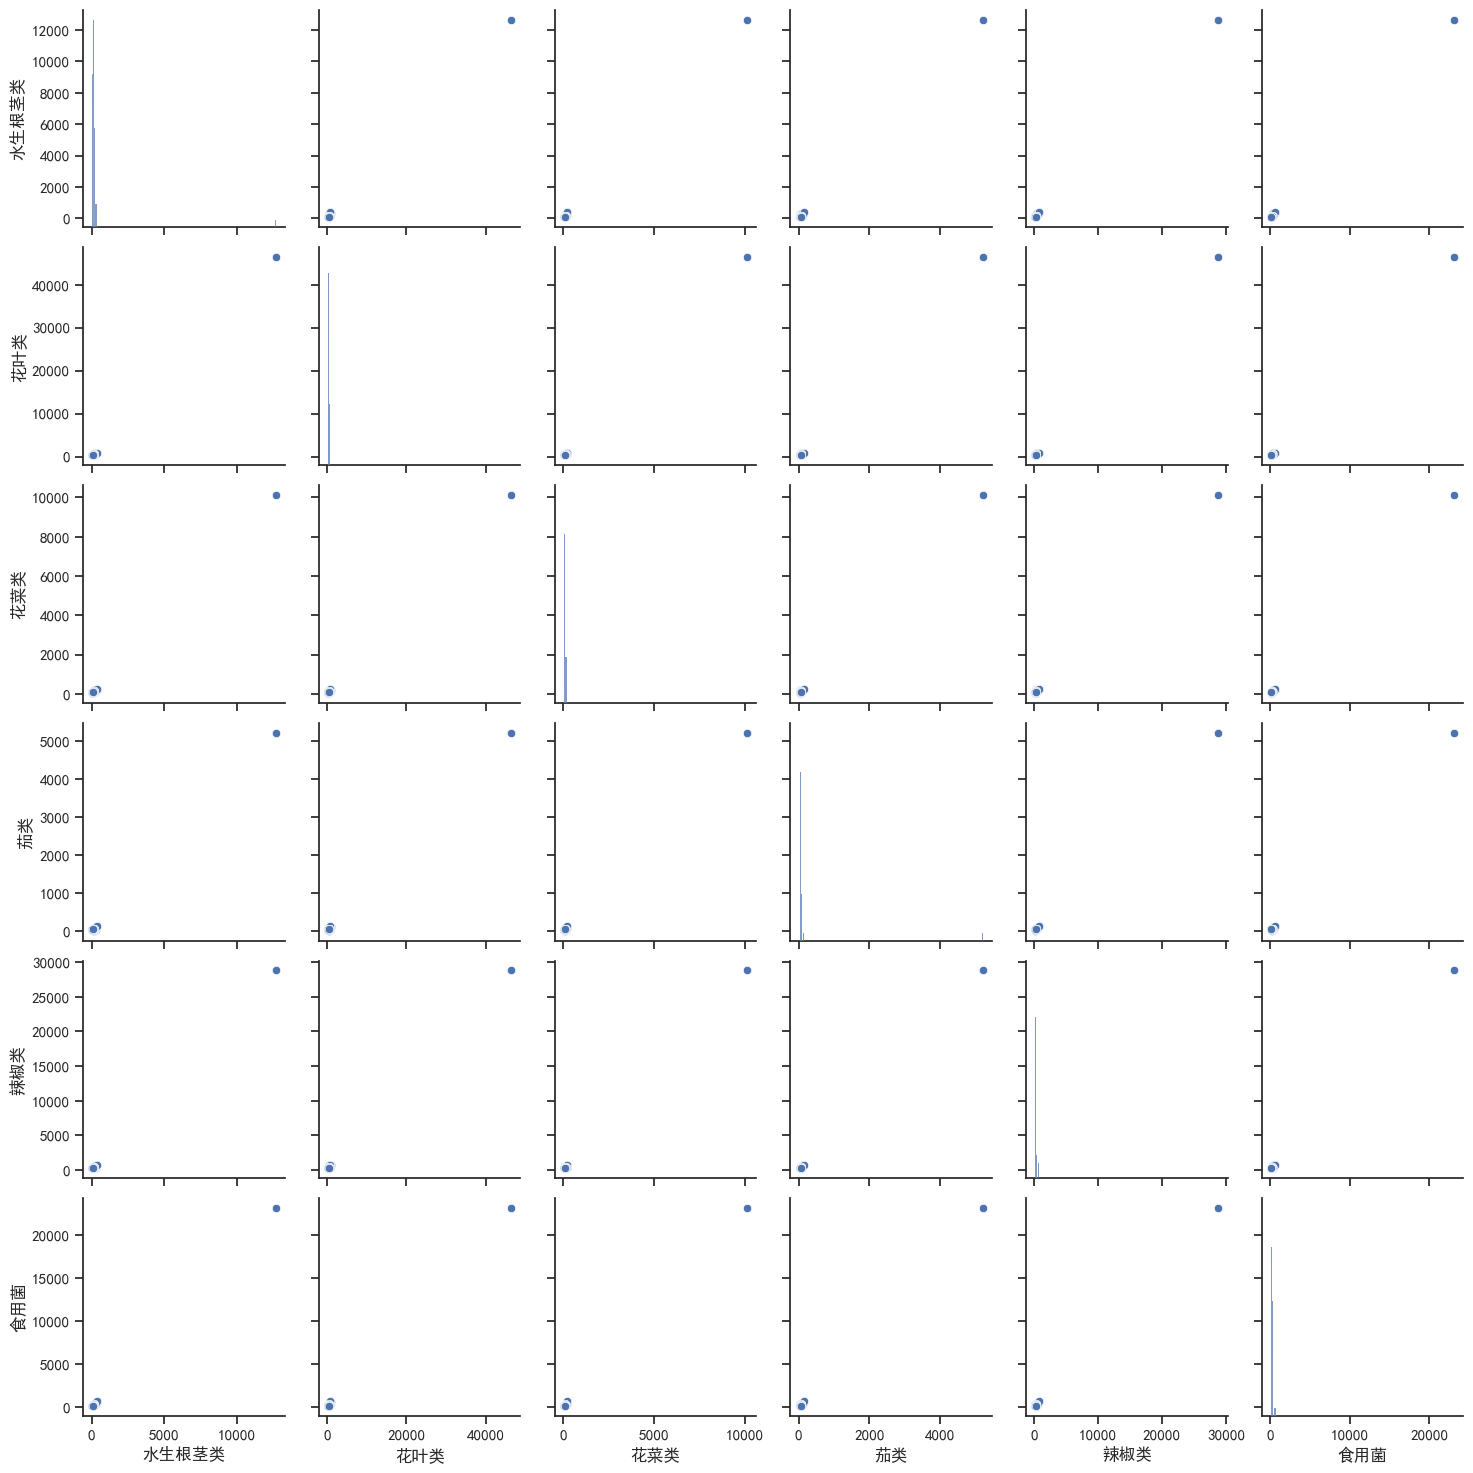

In [40]:
#利用seaborn库内置函数可视化相关关系图
import seaborn as sns 
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.pairplot(quarter1)
# sns.pairplot(quarter2)
# sns.pairplot(quarter3)
# sns.pairplot(quarter4)

In [41]:
#记录以day为计的时间戳的各品类蔬菜销售量
sum_by_date_and_category.to_csv('按品类每天销量.csv')

In [42]:
df

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,单品名称,分类编码,分类名称
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,销售,否,泡泡椒(精品),1011010504,辣椒类
...,...,...,...,...,...,...,...,...,...,...
830675,2023-06-11,10:41:12.092,102900011036686,1.000,3.9,销售,否,木耳菜(份),1011010101,花叶类
830676,2023-06-19,10:18:18.266,102900011036686,1.000,3.9,销售,否,木耳菜(份),1011010101,花叶类
830677,2023-06-21,16:30:43.092,102900011036686,1.000,3.9,销售,否,木耳菜(份),1011010101,花叶类
830678,2023-06-23,18:47:46.777,102900011036686,1.000,3.9,销售,否,木耳菜(份),1011010101,花叶类


In [43]:
#记录以day为计的时间戳的蔬菜各单品销售量
df_product = df[['销售日期','销量(千克)','单品名称']]

#按每天的日期和不同的蔬菜类型集聚统计销量总值
sum_by_date_and_product_temp = df_product.groupby(['销售日期','单品名称'], as_index=False).sum()
sum_by_date_and_product = pd.pivot(sum_by_date_and_product_temp, index='销售日期',columns='单品名称')

#将0级索引'销量(千克)'去除
sum_by_date_and_product.columns=sum_by_date_and_product.columns.droplevel(0)
#将nan值填充为0(因为有可能当天没有买这种蔬菜，而导致出现nan值)
sum_by_date_and_product = sum_by_date_and_product.fillna(0)

sum_by_date_and_product

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,1.909,0.000,0.0,11.476,0.0,0.000,0.0,32.579,0.0,41.966,...,0.0,0.0,6.549,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-02,1.825,0.000,0.0,6.806,0.0,1.392,0.0,27.056,0.0,44.409,...,0.0,0.0,4.176,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-03,1.581,0.000,0.0,12.659,0.0,3.478,0.0,36.709,0.0,36.309,...,0.0,0.0,9.991,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-04,0.693,0.000,0.0,28.186,0.0,4.908,0.0,42.962,0.0,51.205,...,0.0,0.0,17.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-05,1.395,0.000,0.0,11.617,0.0,3.625,0.0,12.594,0.0,33.835,...,0.0,0.0,14.811,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0.000,1.121,0.0,1.420,0.0,0.000,0.0,0.573,5.0,7.971,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-27,0.000,0.999,0.0,1.823,0.0,0.000,0.0,0.293,15.0,0.251,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-28,0.000,1.528,0.0,5.553,0.0,0.000,0.0,0.000,12.0,0.000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
sale_product_discount_within7 = sum_by_date_and_product.loc[['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30']]
sale_product_discount_within7.to_csv('6.24-6.30单品未折销量.csv')
sale_product_discount_within7

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜,本地菠菜,洪山菜薹珍品手提袋,洪山菜薹莲藕拼装礼盒,藕,芜湖青椒(2),芜湖青椒(份),虫草花(盒)(1)
销售日期,,,,,,,,,,,,,,,,,,,,,
2023-06-24,0.0,0.749,0.0,5.127,0.0,0.0,0.0,0.000,24.0,0.000,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2023-06-25,0.0,1.048,0.0,1.383,0.0,0.0,0.0,4.232,13.0,0.557,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2023-06-26,0.0,1.121,0.0,1.420,0.0,0.0,0.0,0.573,5.0,7.971,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2023-06-27,0.0,0.999,0.0,1.823,0.0,0.0,0.0,0.293,15.0,0.251,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2023-06-28,0.0,1.528,0.0,5.553,0.0,0.0,0.0,0.000,12.0,0.000,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2023-06-29,0.0,0.168,0.0,4.687,0.0,0.0,0.0,0.000,22.0,2.904,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2023-06-30,0.0,0.000,0.0,7.036,0.0,0.0,0.0,0.000,23.0,0.000,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [44]:
#记录各年7.1-7.7单品销量
import datetime
product_within21 = sum_by_date_and_product[((sum_by_date_and_product.index >= datetime.datetime.strptime('2020-07-01','%Y-%m-%d')) & (sum_by_date_and_product.index <= datetime.datetime.strptime('2020-07-07','%Y-%m-%d'))) |
                                   ((sum_by_date_and_product.index >= datetime.datetime.strptime('2021-07-01','%Y-%m-%d')) & (sum_by_date_and_product.index <= datetime.datetime.strptime('2021-07-07','%Y-%m-%d'))) |
                                   ((sum_by_date_and_product.index >= datetime.datetime.strptime('2022-07-01','%Y-%m-%d')) & (sum_by_date_and_product.index <= datetime.datetime.strptime('2022-07-07','%Y-%m-%d')))]
#删除异常单品
# sales_within21 = sum_by_date_and_product.drop(abnormal_list, axis=1)

product_within21.to_csv('各年7.1-7.7单品销量.csv')
product_within21

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,1.909,0.000,0.0,11.476,0.0,0.000,0.0,32.579,0.0,41.966,...,0.000,0.0,6.549,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-02,1.825,0.000,0.0,6.806,0.0,1.392,0.0,27.056,0.0,44.409,...,0.000,0.0,4.176,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-03,1.581,0.000,0.0,12.659,0.0,3.478,0.0,36.709,0.0,36.309,...,0.000,0.0,9.991,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-04,0.693,0.000,0.0,28.186,0.0,4.908,0.0,42.962,0.0,51.205,...,0.000,0.0,17.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-05,1.395,0.000,0.0,11.617,0.0,3.625,0.0,12.594,0.0,33.835,...,0.000,0.0,14.811,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-06,1.273,0.000,0.0,13.458,0.0,0.000,0.0,11.053,0.0,36.532,...,0.000,0.0,8.631,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-07,1.323,0.000,0.0,9.861,0.0,1.266,0.0,28.214,0.0,30.058,...,0.000,0.0,8.897,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-01,0.000,0.000,0.0,7.609,0.0,3.537,0.0,11.761,0.0,40.607,...,0.000,0.0,2.876,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-02,0.000,0.000,0.0,6.564,0.0,1.747,0.0,13.161,0.0,21.669,...,0.000,0.0,11.155,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#记录6.24-6.30的单品总销量
df = pd.merge(sales_flow_data_1, product_info,on= '单品编码')
df_product = df[['销售日期','销量(千克)','单品名称']]

#按每天的日期和不同的蔬菜类型集聚统计销量总值
sum_by_date_and_product_temp = df_product.groupby(['销售日期','单品名称'], as_index=False).sum()
sum_by_date_and_product = pd.pivot(sum_by_date_and_product_temp, index='销售日期',columns='单品名称')

#将0级索引'销量(千克)'去除
sum_by_date_and_product.columns=sum_by_date_and_product.columns.droplevel(0)
#将nan值填充为0(因为有可能当天没有买这种蔬菜，而导致出现nan值)
sum_by_date_and_product = sum_by_date_and_product.fillna(0)

product_within7 = sum_by_date_and_product.loc[['2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30']]

product_within7.to_csv('6.24-6.30单品总销量.csv')
product_within7


单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2023-06-24,0.0,0.951,0.0,5.127,0.0,0.0,0.0,0.000,26.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-25,0.0,1.048,0.0,1.383,0.0,0.0,0.0,4.232,19.0,0.557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-26,0.0,1.506,0.0,1.420,0.0,0.0,0.0,0.573,14.0,7.971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-27,0.0,2.101,0.0,1.823,0.0,0.0,0.0,0.293,18.0,0.251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-28,0.0,1.528,0.0,5.553,0.0,0.0,0.0,0.000,21.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-29,0.0,0.168,0.0,4.687,0.0,0.0,0.0,0.000,26.0,2.904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-30,0.0,0.000,0.0,7.036,0.0,0.0,0.0,0.000,25.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#寻找单品每日销量缺失值
missing_value_list = []
for i in product_info['单品名称']:
    flag = False
    for j in sum_by_date_and_product.columns:
        if i==j:
            flag = True
    if not flag:
        missing_value_list.append(i)

missing_value_list

['本地菠菜', '洪山菜薹珍品手提袋', '洪山菜薹莲藕拼装礼盒', '藕', '芜湖青椒(2)', '芜湖青椒(份)', '虫草花(盒)(1)']

In [46]:
#补入缺失值
for name in missing_value_list:
    sum_by_date_and_product[name] = [0 for i in range(len(sum_by_date_and_product))]

sum_by_date_and_product.to_csv('按单品每天销量.csv')

In [47]:
#z-score标准化用于后续相关性分析
# import matplotlib.pyplot as plt

# for i in range(len(name_pool)):
#     mean = sum_by_date_and_category[name_pool[i]].mean()
#     std = sum_by_date_and_category[name_pool[i]].std()
#     norm = (sum_by_date_and_category[name_pool[i]] - mean)/std
#     sum_by_date_and_category[name_pool[i]] = norm
    
# sum_by_date_and_category

In [48]:
a = df[df['分类名称'] == '花叶类']['单品名称'].unique()
len(a)

97

In [49]:
df_product = df[['销售日期','销量(千克)','单品名称','分类名称']]
df_product = df_product.query('分类名称 in ["花叶类", "花菜类"]')
Foliage_product = df_product[df_product['分类名称'] == '花叶类'].drop('分类名称', axis=1)
Cauliflower_product = df_product[df_product['分类名称'] == '花菜类'].drop('分类名称', axis=1)

#按每天的日期和不同的花叶类单品名称集聚统计销量总值
sum_foliage_product_temp = Foliage_product.groupby(['销售日期','单品名称'], as_index=False).sum()
sum_foliage_product = pd.pivot(sum_foliage_product_temp, index='销售日期',columns='单品名称')

# 将0级索引'销量(千克)'去除
sum_foliage_product.columns=sum_foliage_product.columns.droplevel(0)
# 将nan值填充为0(因为有可能当天没有买这种蔬菜，而导致出现nan值)
sum_foliage_product = sum_foliage_product.fillna(0)

#按每天的日期和不同的花菜类单品名称集聚统计销量总值
sum_cauliflower_product_temp = Cauliflower_product.groupby(['销售日期','单品名称'], as_index=False).sum()
sum_cauliflower_product = pd.pivot(sum_cauliflower_product_temp, index='销售日期',columns='单品名称')

# 将0级索引'销量(千克)'去除
sum_cauliflower_product.columns=sum_cauliflower_product.columns.droplevel(0)
# 将nan值填充为0(因为有可能当天没有买这种蔬菜，而导致出现nan值)
sum_cauliflower_product = sum_cauliflower_product.fillna(0)

#检查发现2022-03-29 当天花菜类各类单品都没有销售量所以少了一条数据，后面进行补全
for i in range(len(sum_foliage_product.index)):
    if sum_foliage_product.index[i] not in  sum_cauliflower_product.index:
        print(sum_foliage_product.index[i])

#添加id列用于插入空缺值
sum_cauliflower_product['id'] = [i for i in range(len(sum_cauliflower_product))]
missing_value_id= sum_cauliflower_product.loc[sum_cauliflower_product.index == '2022-03-28']['id'].values

sum_cauliflower_product = pd.DataFrame(np.insert(sum_cauliflower_product.values, missing_value_id, values=[0,0,0,0,0,0], axis=0),columns= sum_cauliflower_product.columns)
#插入后删除id列
sum_cauliflower_product = sum_cauliflower_product.drop('id', axis=1)
sum_foliage_product, sum_cauliflower_product

2021-10-11 00:00:00
2022-03-29 00:00:00


(单品名称           上海青  上海青(份)  东门口小白菜  丝瓜尖   云南油麦菜  云南油麦菜(份)    云南生菜  云南生菜(份)  \
 销售日期                                                                         
 2020-07-01  11.476     0.0   0.000  0.0  32.579       0.0  41.966      0.0   
 2020-07-02   6.806     0.0   1.392  0.0  27.056       0.0  44.409      0.0   
 2020-07-03  12.659     0.0   3.478  0.0  36.709       0.0  36.309      0.0   
 2020-07-04  28.186     0.0   4.908  0.0  42.962       0.0  51.205      0.0   
 2020-07-05  11.617     0.0   3.625  0.0  12.594       0.0  33.835      0.0   
 ...            ...     ...     ...  ...     ...       ...     ...      ...   
 2023-06-26   1.420     0.0   0.000  0.0   0.573       5.0   7.971      2.0   
 2023-06-27   1.823     0.0   0.000  0.0   0.293      15.0   0.251     22.0   
 2023-06-28   5.553     0.0   0.000  0.0   0.000      12.0   0.000     32.0   
 2023-06-29   4.687     0.0   0.000  0.0   0.000      22.0   2.904     25.0   
 2023-06-30   7.036     0.0   0.000  0.0   0.000    

In [50]:
# 利用pandas库内置函数,评价花叶类和花菜类内各自单品间相关性
#参数说明：
#method：可选值为{‘pearson’, ‘kendall’, ‘spearman’}
#pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性数据便会有误差。
#kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正态分布的数据
#spearman：非线性的，非正太分析的数据的相关系数
#min_periods：样本最少的数据量
#返回值：各类型之间的相关系数DataFrame表格。

foliage_pd_pearson = sum_foliage_product.corr(method= 'pearson')
foliage_pd_kendall = sum_foliage_product.corr(method= 'kendall')
foliage_pd_spearman = sum_foliage_product.corr(method= 'spearman')

cauliflower_pd_pearson = sum_cauliflower_product.corr(method= 'pearson')
cauliflower_pd_kendall = sum_cauliflower_product.corr(method= 'kendall')
cauliflower_pd_spearman = sum_cauliflower_product.corr(method= 'spearman')

foliage_pd_pearson, foliage_pd_kendall, foliage_pd_spearman, cauliflower_pd_pearson, cauliflower_pd_kendall, cauliflower_pd_spearman

(单品名称         上海青    上海青(份)    东门口小白菜       丝瓜尖     云南油麦菜  云南油麦菜(份)      云南生菜  \
 单品名称                                                                           
 上海青     1.000000 -0.296545  0.077941 -0.018215  0.619911 -0.303283  0.540282   
 上海青(份) -0.296545  1.000000 -0.109199 -0.014458 -0.222664  0.631484 -0.261371   
 东门口小白菜  0.077941 -0.109199  1.000000  0.024065  0.107434 -0.250824  0.158965   
 丝瓜尖    -0.018215 -0.014458  0.024065  1.000000 -0.007257 -0.029513 -0.005318   
 云南油麦菜   0.619911 -0.222664  0.107434 -0.007257  1.000000 -0.399412  0.575716   
 ...          ...       ...       ...       ...       ...       ...       ...   
 黄白菜(1) -0.162063  0.389348 -0.103106 -0.017622 -0.138211  0.344889 -0.146535   
 黄白菜(2)  0.467707 -0.024577 -0.007249 -0.021710  0.372870 -0.094374  0.434829   
 黄花菜     0.005874 -0.019284 -0.032080 -0.005483 -0.041028  0.036649 -0.046888   
 黑油菜    -0.082418  0.564946 -0.053095 -0.009152 -0.060770  0.189952 -0.074341   
 龙牙菜    -0.173747  0.389914 

In [51]:
#利用scipy库内置函数
import scipy.stats as ss

foliage_pool = sum_foliage_product.columns
cauliflower_pool = sum_cauliflower_product.columns

pearson_data_list = []
for i in range(len(foliage_pool)):
    data_list_single = []
    for j in range(len(cauliflower_pool)):
        data_list_single.append(ss.pearsonr(sum_cauliflower_product[cauliflower_pool[j]], sum_foliage_product[foliage_pool[i]]))
    pearson_data_list.append(data_list_single)
data_scipy_pearson = pd.DataFrame(pearson_data_list, index=foliage_pool, columns=cauliflower_pool)

kendall_data_list = []
for i in range(len(foliage_pool)):
    data_list_single = []
    for j in range(len(cauliflower_pool)):
        data_list_single.append(ss.kendalltau(sum_cauliflower_product[cauliflower_pool[j]], sum_foliage_product[foliage_pool[i]]))
    kendall_data_list.append(data_list_single)
data_scipy_kendall = pd.DataFrame(kendall_data_list, index=foliage_pool, columns=cauliflower_pool)

spearman_data_list = []
for i in range(len(foliage_pool)):
    data_list_single = []
    for j in range(len(cauliflower_pool)):
        data_list_single.append(ss.spearmanr(sum_cauliflower_product[cauliflower_pool[j]], sum_foliage_product[foliage_pool[i]]))
    spearman_data_list.append(data_list_single)
data_scipy_spearman = pd.DataFrame(spearman_data_list, index=foliage_pool, columns=cauliflower_pool)


ValueError: x and y must have the same length.

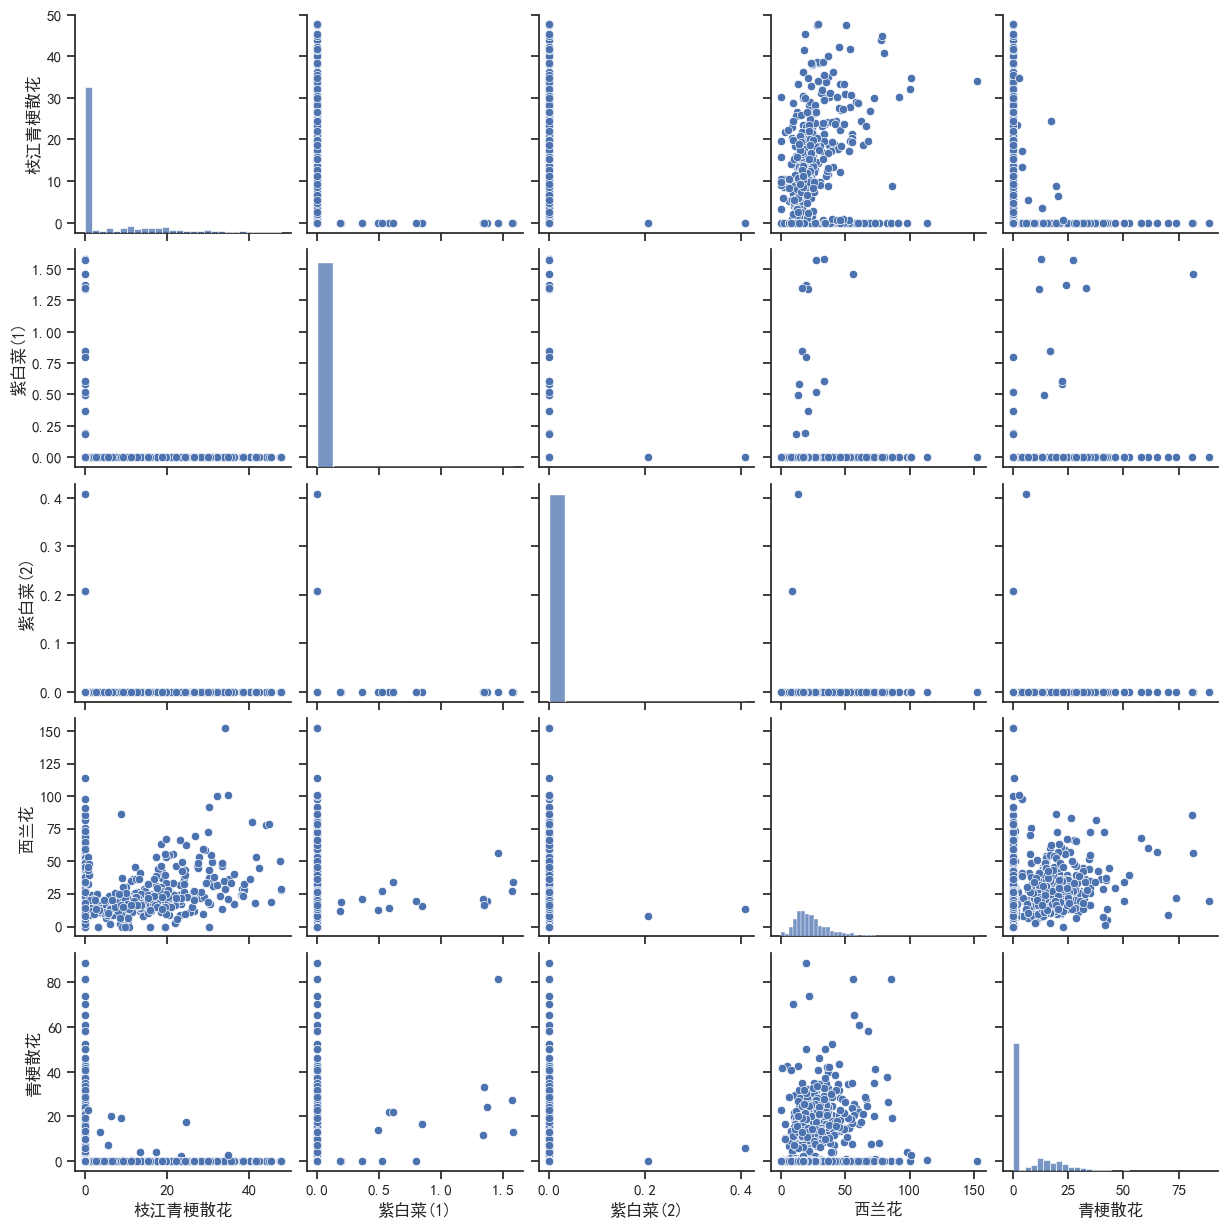

In [ ]:
#利用seaborn库内置函数可视化相关关系图(只用于花菜类因为size为5*5可以画的出来)
import seaborn as sns 
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.pairplot(sum_cauliflower_product)

In [ ]:
#记录花叶类和花菜类各自类内单品销量的相关性分析结果
with pd.ExcelWriter('问题一花叶类与花菜类单品销量相关性分析.xlsx') as writer:
    foliage_pd_pearson.to_excel(writer, sheet_name='花叶类单品Pearson')
    foliage_pd_kendall.to_excel(writer, sheet_name='花叶类单品Kendall')
    foliage_pd_spearman.to_excel(writer, sheet_name='花叶类单品Spearman')
    cauliflower_pd_pearson.to_excel(writer, sheet_name='花菜类单品Pearson')
    cauliflower_pd_kendall.to_excel(writer, sheet_name='花菜类单品Kendall')
    cauliflower_pd_spearman.to_excel(writer, sheet_name='花菜类单品Spearman')
    data_scipy_pearson.to_excel(writer, sheet_name='花叶-花菜单品Pearson')
    data_scipy_kendall.to_excel(writer, sheet_name='花叶-花菜单品Kendall')
    data_scipy_spearman.to_excel(writer, sheet_name='花叶-花菜单品Spearman')

In [ ]:
#1.利用numpy库内置函数，结果为Pearson乘积矩相关系数，值越大代表相关性越强
name_pool = ['水生根茎类','花叶类','花菜类','茄类','辣椒类','食用菌']

result1 = np.corrcoef(sum_by_date_and_category, rowvar=False) #rowvar=false代表以列值为统计量计算相关系数矩阵

data_np = pd.DataFrame(result1,index= name_pool, columns= name_pool)
data_np

,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
水生根茎类,1.000000,0.561287,0.542507,0.074423,0.614364,0.670189
花叶类,0.561287,1.000000,0.627670,0.257879,0.659790,0.631075
花菜类,0.542507,0.627670,1.000000,0.311873,0.551288,0.523076
茄类,0.074423,0.257879,0.311873,1.000000,0.273673,0.119808
辣椒类,0.614364,0.659790,0.551288,0.273673,1.000000,0.687485
食用菌,0.670189,0.631075,0.523076,0.119808,0.687485,1.000000


In [ ]:
#2.利用scipy库内置函数，输出：
#                          r： 相关系数 [-1，1]之间
#                    p-value: p值。p值越小，表示相关系数越显著，一般p值在500个样本以上时有较高的可靠性
#但他只能用于两列属性值之间的相关性分析，所以下面进行遍历
import scipy.stats as ss

Aquatic_Roots = sum_by_date_and_category['水生根茎类']
Foliage = sum_by_date_and_category['花叶类']
Cauliflower = sum_by_date_and_category['花菜类']
Eggplant = sum_by_date_and_category['茄类']
Capsicum = sum_by_date_and_category['辣椒类']
Edible_Fungi = sum_by_date_and_category['食用菌']

data_pool = [Aquatic_Roots,Foliage,Cauliflower,Eggplant,Capsicum,Edible_Fungi]

data_list = []
for i in range(len(data_pool)):
    data_list_single = []
    for j in range(len(name_pool)):
        data_list_single.append(ss.pearsonr(data_pool[i], data_pool[j]))
    data_list.append(data_list_single)

data_scipy = pd.DataFrame(data_list, index=name_pool, columns=name_pool)
data_scipy

,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
水生根茎类,"(0.9999999999999999, 0.0)","(0.5612868635599201, 4.4276749075097916e-91)","(0.5425069320142454, 4.702947418287695e-84)","(0.07442251937376387, 0.014206315857438288)","(0.614364459137389, 1.390514362282678e-113)","(0.6701890826453032, 2.118095124054165e-142)"
花叶类,"(0.5612868635599201, 4.4276749075097916e-91)","(1.0, 0.0)","(0.6276704747059111, 6.407090811650335e-120)","(0.25787928535368865, 6.0831976542885665e-18)","(0.6597902644666256, 1.4597384953033734e-136)","(0.6310753112438485, 1.3655117804719522e-121)"
花菜类,"(0.5425069320142454, 4.702947418287695e-84)","(0.6276704747059111, 6.407090811650335e-120)","(1.0, 0.0)","(0.31187318935311825, 6.650133765076826e-26)","(0.551287954368382, 2.7714402314168707e-87)","(0.523075701242953, 3.0829639628230694e-77)"
茄类,"(0.07442251937376387, 0.014206315857438288)","(0.25787928535368865, 6.0831976542885665e-18)","(0.31187318935311825, 6.650133765076826e-26)","(0.9999999999999999, 0.0)","(0.27367256907709137, 4.3102192324553385e-20)","(0.11980750933084715, 7.618698154135273e-05)"
辣椒类,"(0.614364459137389, 1.390514362282678e-113)","(0.6597902644666256, 1.4597384953033734e-136)","(0.551287954368382, 2.7714402314168707e-87)","(0.27367256907709137, 4.3102192324553385e-20)","(0.9999999999999999, 0.0)","(0.6874846141198206, 1.1750210276996576e-152)"
食用菌,"(0.6701890826453032, 2.118095124054165e-142)","(0.6310753112438485, 1.3655117804719522e-121)","(0.523075701242953, 3.0829639628230694e-77)","(0.11980750933084715, 7.618698154135273e-05)","(0.6874846141198206, 1.1750210276996576e-152)","(1.0, 0.0)"


In [ ]:
#3.利用pandas库内置函数，
#参数说明：
#method：可选值为{‘pearson’, ‘kendall’, ‘spearman’}
#pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性数据便会有误差。
#kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正态分布的数据
#spearman：非线性的，非正太分析的数据的相关系数
#min_periods：样本最少的数据量
#返回值：各类型之间的相关系数DataFrame表格。

data_pd_pearson = sum_by_date_and_category.corr(method= 'pearson')
data_pd_kendall = sum_by_date_and_category.corr(method= 'kendall')
data_pd_spearman = sum_by_date_and_category.corr(method= 'spearman')

data_pd_pearson, data_pd_kendall, data_pd_spearman

(分类名称      水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
 分类名称                                                             
 水生根茎类  1.000000  0.561287  0.542507  0.074423  0.614364  0.670189
 花叶类    0.561287  1.000000  0.627670  0.257879  0.659790  0.631075
 花菜类    0.542507  0.627670  1.000000  0.311873  0.551288  0.523076
 茄类     0.074423  0.257879  0.311873  1.000000  0.273673  0.119808
 辣椒类    0.614364  0.659790  0.551288  0.273673  1.000000  0.687485
 食用菌    0.670189  0.631075  0.523076  0.119808  0.687485  1.000000,
 分类名称      水生根茎类       花叶类       花菜类        茄类       辣椒类       食用菌
 分类名称                                                             
 水生根茎类  1.000000  0.306558  0.272638 -0.138970  0.233193  0.431768
 花叶类    0.306558  1.000000  0.456042  0.183014  0.425687  0.423923
 花菜类    0.272638  0.456042  1.000000  0.129604  0.297523  0.318563
 茄类    -0.138970  0.183014  0.129604  1.000000  0.076948 -0.074703
 辣椒类    0.233193  0.425687  0.297523  0.076948  1.000000  0.3

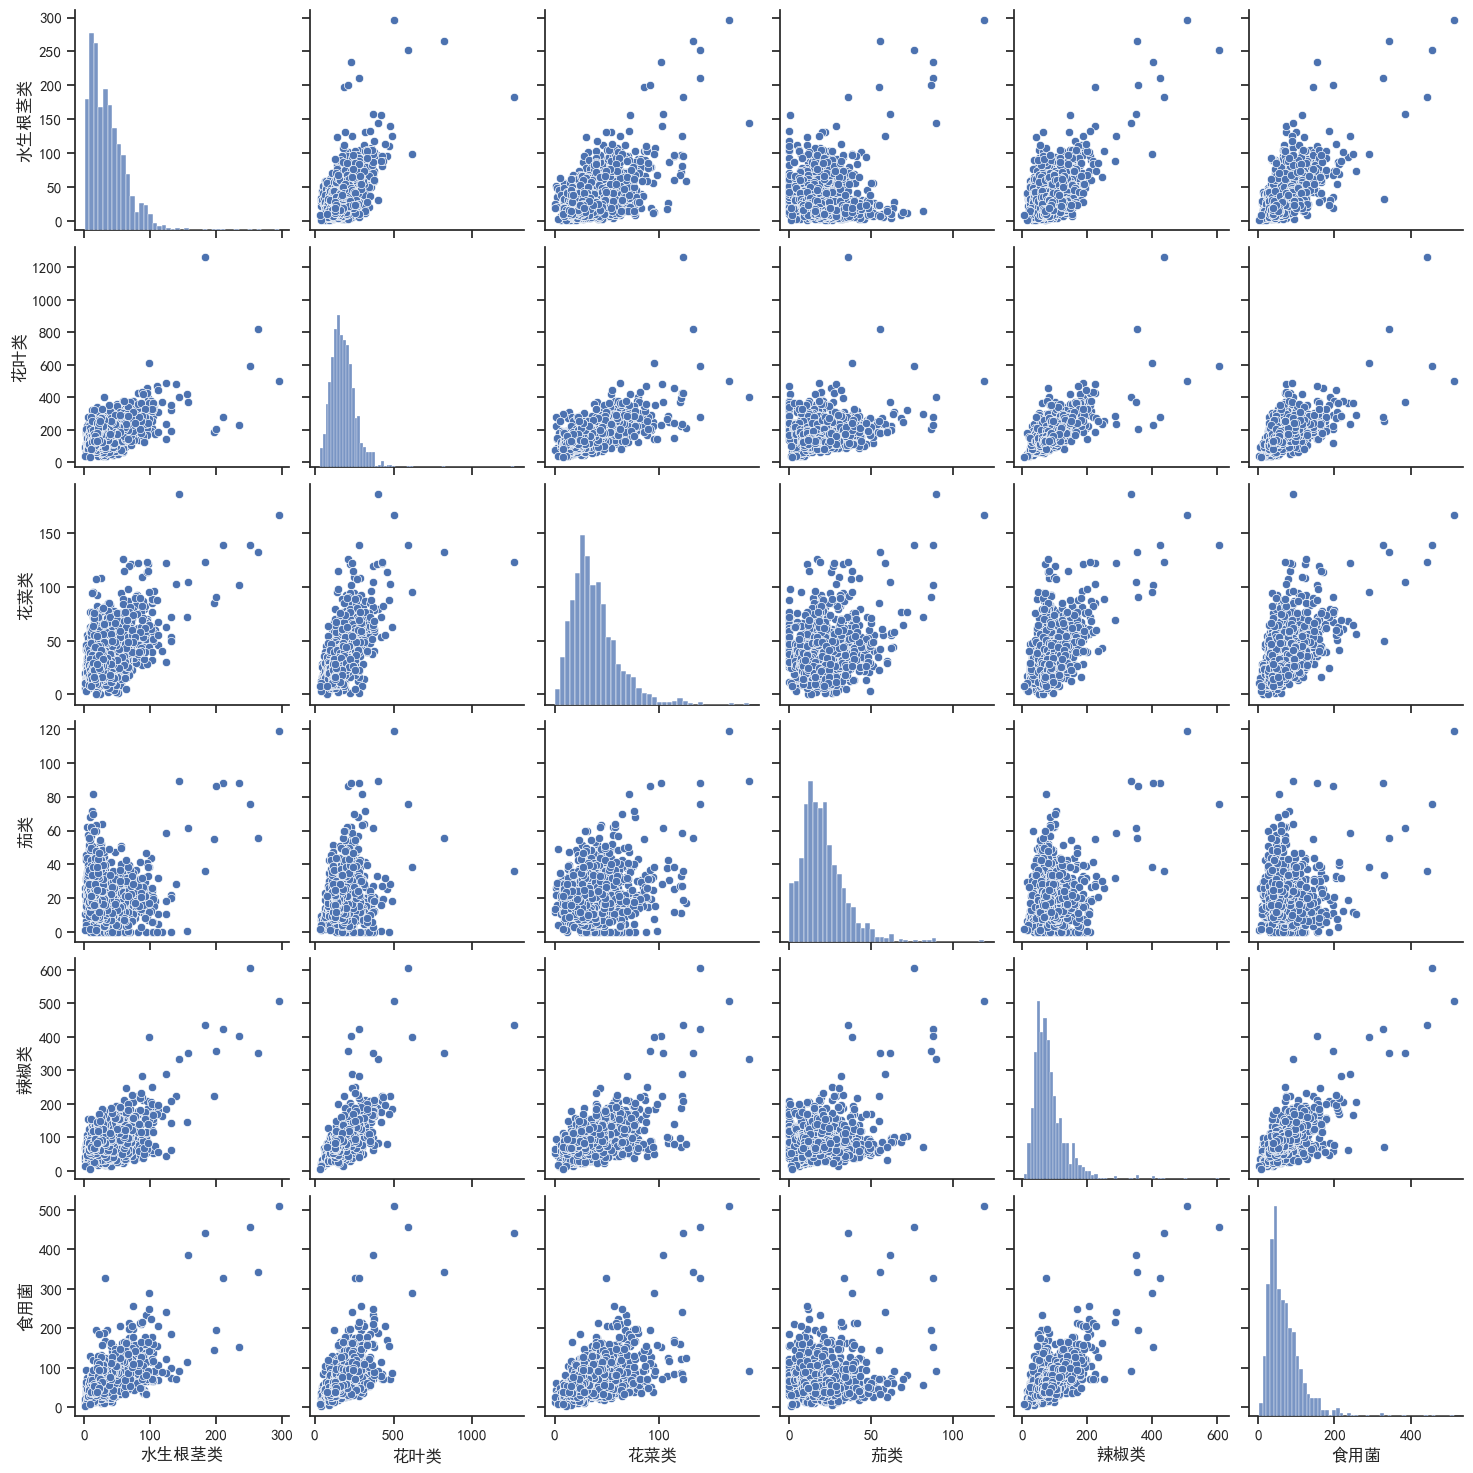

In [ ]:
#4.利用seaborn库内置函数可视化相关关系图
import seaborn as sns 
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.pairplot(sum_by_date_and_category)

In [ ]:
#记录对各品类销量相关性分析的结果值
with pd.ExcelWriter('问题一各品类销量相关性分析.xlsx') as writer:
    data_np.to_excel(writer, sheet_name='numpy-Pearson')
    data_scipy.to_excel(writer, sheet_name='scipy-Pearson')
    data_pd_pearson.to_excel(writer, sheet_name='pandas-Pearson')
    data_pd_kendall.to_excel(writer, sheet_name='pandas-Kendall')
    data_pd_spearman.to_excel(writer, sheet_name='pandas-Spearman')

    quarter1_pd_pearson.to_excel(writer, sheet_name='quarter1-pandas-Pearson')
    quarter1_pd_kendall.to_excel(writer, sheet_name='quarter1-pandas-Kendall')
    quarter1_pd_spearman.to_excel(writer, sheet_name='quarter1-pandas-Spearman')

    quarter2_pd_pearson.to_excel(writer, sheet_name='quarter2-pandas-Pearson')
    quarter2_pd_kendall.to_excel(writer, sheet_name='quarter2-pandas-Kendall')
    quarter2_pd_spearman.to_excel(writer, sheet_name='quarter2-pandas-Spearman')

    quarter3_pd_pearson.to_excel(writer, sheet_name='quarter3-pandas-Pearson')
    quarter3_pd_kendall.to_excel(writer, sheet_name='quarter3-pandas-Kendall')
    quarter3_pd_spearman.to_excel(writer, sheet_name='quarter3-pandas-Spearman')

    quarter4_pd_pearson.to_excel(writer, sheet_name='quarter4-pandas-Pearson')
    quarter4_pd_kendall.to_excel(writer, sheet_name='quarter4-pandas-Kendall')
    quarter4_pd_spearman.to_excel(writer, sheet_name='quarter4-pandas-Spearman')